# Quantum search using Grover's Algorithm

## Search problems

If we have a name and we’re trying to find their phone number, this is easy as phone books are generally sorted alphabetically by names.

<!-- ::: q-block -->

### Example: Binary search

<!-- ::: q-carousel -->

<!-- ::: div -->

Binary search is a very efficient algorithm for searching sorted databases, and you’ve probably used something similar when searching for a specific page in a book (or even using a physical phonebook). Let’s say we’re searching for the name “Evelina Ansel”.

![Example of a database](images/grover/carousel/0/0.svg)

<!-- ::: -->

<!-- ::: div -->

First, we check the middle item in the database and see if it’s higher or lower than the item we’re searching for.

![Example of the first step of a binary search algorithm, the middle entry is selected](images/grover/carousel/0/1.svg)

<!-- ::: -->

<!-- ::: div -->

In this case “H” is higher than “E”, and since the list is sorted we know that the address of the entry we’re looking for has to be lower than 7. We can ignore any addresses larger than 7 and repeat this algorithm on the reduced list.

![Second step of a binary search algorithm](images/grover/carousel/0/2.svg)

<!-- ::: -->

<!-- ::: div -->

This time, the middle entry’s name begins with “D”, which is lower than “E”. Now we know our entry must have address higher than 3.

![Third step of a binary search algorithm](images/grover/carousel/0/3.svg)

<!-- ::: -->

<!-- ::: div -->

Each step halves the size of list we’re working on, so the search space _shrinks_ exponentially.

![Fourth step of a binary search algorithm](images/grover/carousel/0/4.svg)

<!-- ::: -->

<!-- ::: div -->

Which means we can find entries in even very large databases quickly.

![Fifth step of a binary search algorithm](images/grover/carousel/0/5.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Since binary search runs in logarithmic time, there isn’t much room for improvement from a quantum computer, but we don’t always have the convenience of searching sorted lists. What if instead, we were given a number, and we wanted to find the name associated with that number?

This is a lot more difficult, as now there’s no way of homing in on our target as we did last time. Assuming the phone numbers are ordered randomly in the list, the best we can do is randomly pick an input, see if it matches the number we’re looking for, and repeat until we happen upon the correct entry.

![Comparison of best algorithm run times for quantum and classical unstructured search](images/grover/q-vs-c.svg)

## Elements of Quantum Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plotter

In [2]:
from marked_number_boxes import quantum_box, find_number_in_quantum_box

max_number = 8
my_box = quantum_box(max_number, print_self = True)

ModuleNotFoundError: No module named 'marked_number_boxes'

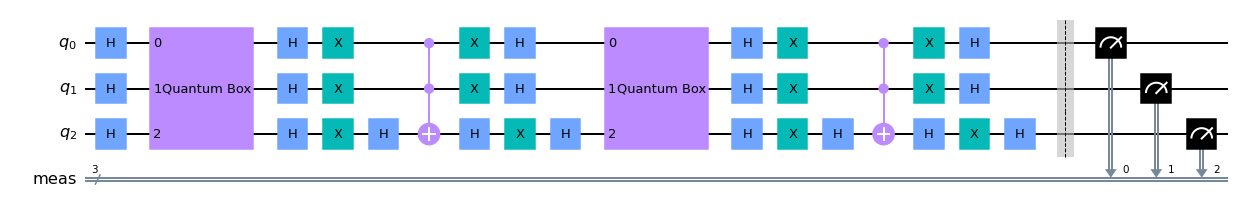

In [3]:
quantum_program = find_number_in_quantum_box(my_box)
quantum_program.draw()

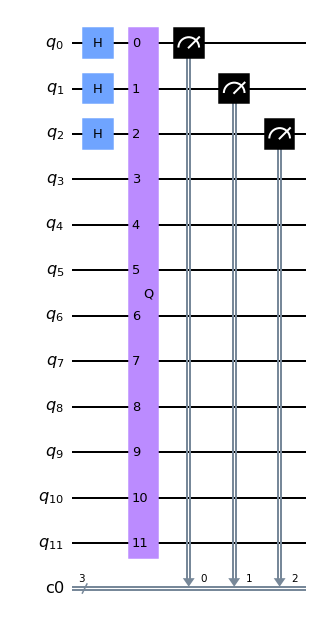

In [4]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

input_constraints = \
'''
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

oracle = LogicalExpressionOracle(input_constraints)
grover = Grover(oracle)
grover.construct_circuit(measurement=True).draw()

Each gate in the circuits above is, in itself, translated to microwave pulses that control and manipulate the quantum states on the physical qubits. 

https://www.ibm.com/events/activations-quantum

## Key concepts

1. The ability to create `superpositions` and `interfere` them
2. The ability to `entangle` multiple qubits

## 1. The ability to create `superpositions` and `interfere` them

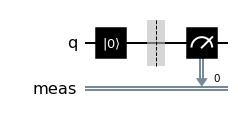

In [5]:
from qiskit import QuantumCircuit

number_of_qubits = 1
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.measure_all()

my_circuit.draw()

{'0': 10000}


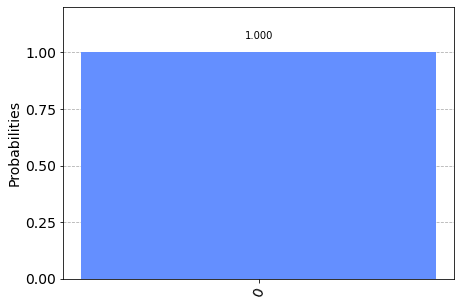

In [6]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

from qiskit.visualization import plot_histogram
print(counts)
plot_histogram(counts)

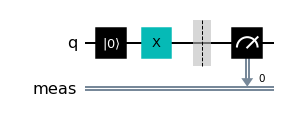

{'1': 10000}


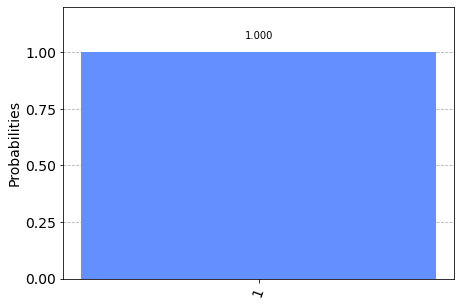

In [7]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

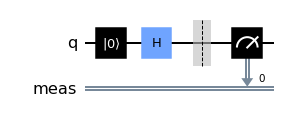

{'0': 5023, '1': 4977}


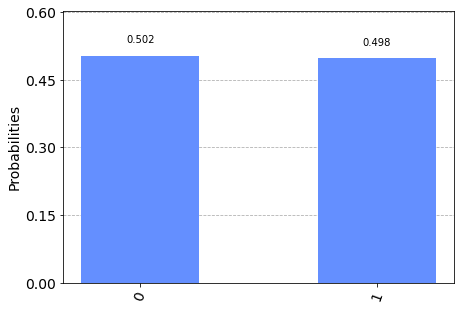

In [8]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

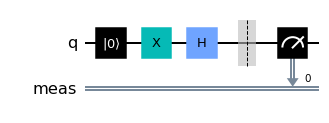

{'0': 4977, '1': 5023}


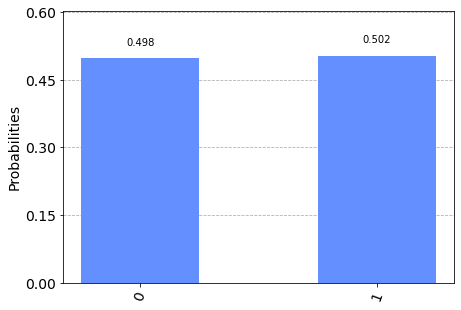

In [9]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

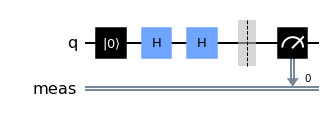

In [10]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.h(0)
my_circuit.measure_all()

display(my_circuit.draw())

{'0': 10000}


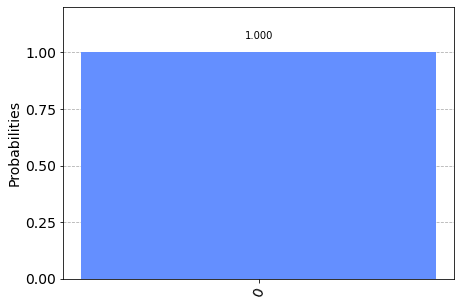

In [11]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

## What happened?

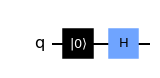

In [12]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)

my_circuit.draw()

In [13]:
from qiskit.quantum_info import Statevector

quantum_state = Statevector.from_instruction(my_circuit)

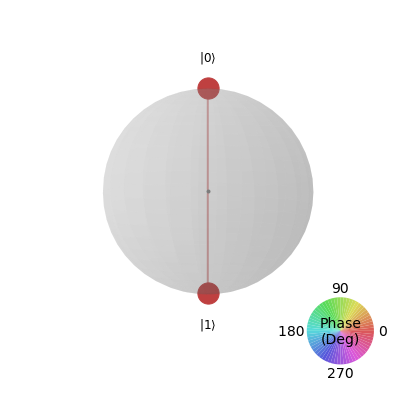

In [14]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(quantum_state, use_degrees=True)

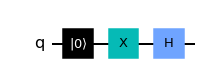

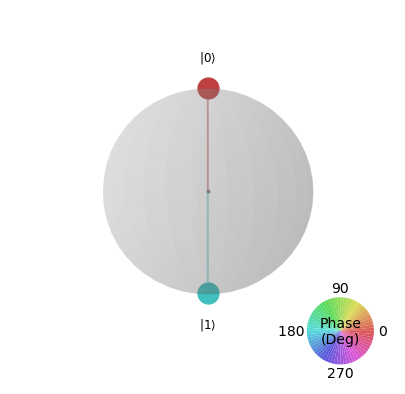

In [15]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.x(0)
my_circuit.h(0)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

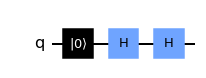

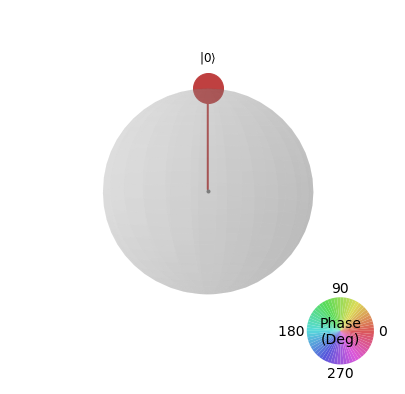

In [16]:
my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(0)
my_circuit.h(0)
my_circuit.h(0)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

<center><img src='./ieeeqw2020-abe-asfaw-talk-dependencies/images/grover/interference.png'></center>

## `Superpositions` with multiple qubits

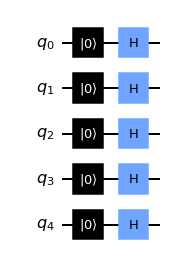

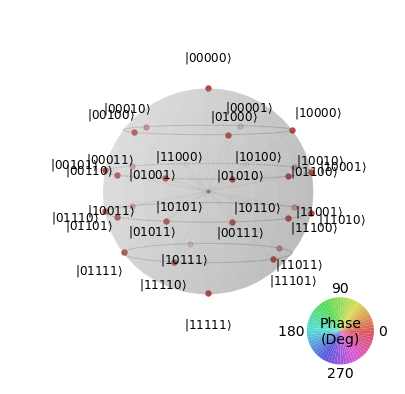

In [17]:
number_of_qubits = 5 # can do even more qubits

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(my_circuit.qubits)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

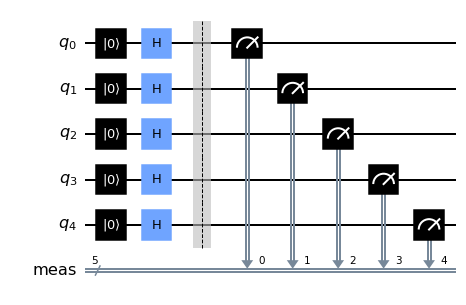

{'00000': 371, '00001': 284, '10000': 301, '10001': 296, '10010': 296, '10011': 334, '10100': 327, '10101': 331, '10110': 314, '10111': 324, '11000': 304, '11001': 306, '11010': 312, '11011': 307, '11100': 309, '11101': 323, '11110': 308, '11111': 313, '00010': 324, '00011': 332, '00100': 325, '00101': 324, '00110': 300, '00111': 332, '01000': 310, '01001': 289, '01010': 319, '01011': 301, '01100': 281, '01101': 289, '01110': 310, '01111': 304}


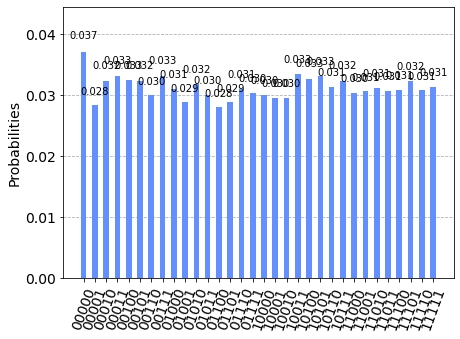

In [18]:
my_circuit.measure_all()

display(my_circuit.draw())

simulator = Aer.get_backend('qasm_simulator')
counts = execute(my_circuit, backend=simulator, shots=10000).result().get_counts()

print(counts)
plot_histogram(counts)

### Just because we can create `superpositions` doesn't mean we can quickly try all possible solutions and get a desired result. All outcomes are equally likely during measurement.

## 2. The ability to `entangle` multiple qubits

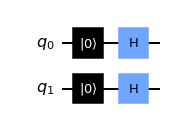

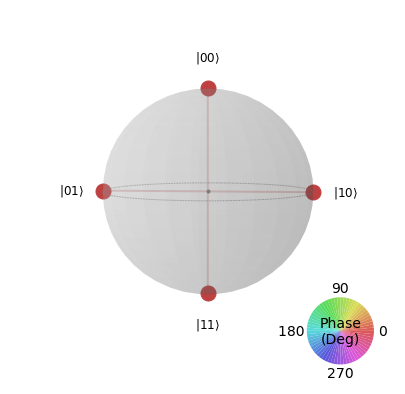

In [19]:
number_of_qubits = 2

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(my_circuit.qubits)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

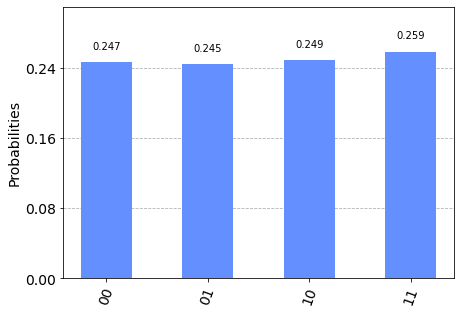

In [20]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))

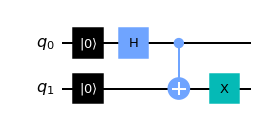

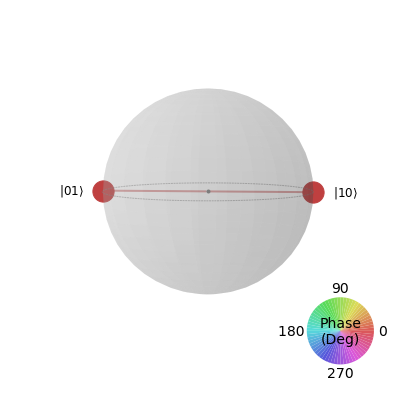

In [21]:
number_of_qubits = 2

my_circuit = QuantumCircuit(number_of_qubits)

my_circuit.reset(my_circuit.qubits)
my_circuit.h(0)
my_circuit.cx(0, 1)
my_circuit.x(1)

display(my_circuit.draw())

quantum_state = Statevector.from_instruction(my_circuit)
plot_state_qsphere(quantum_state, use_degrees=True)

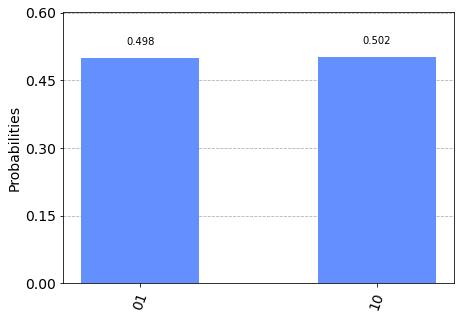

In [22]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))

## `Superposition`, `interference` and `entanglement` in action
Remember the unstructured search problem?

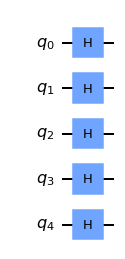

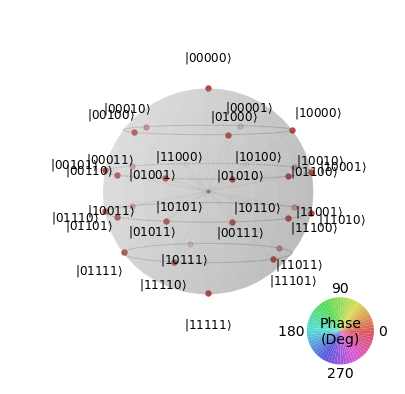

In [23]:
from marked_number_boxes import quantum_box, search_steps

my_box = quantum_box(32)

quantum_program = search_steps(my_box, 0)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

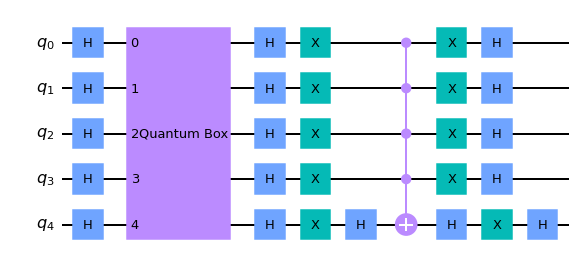

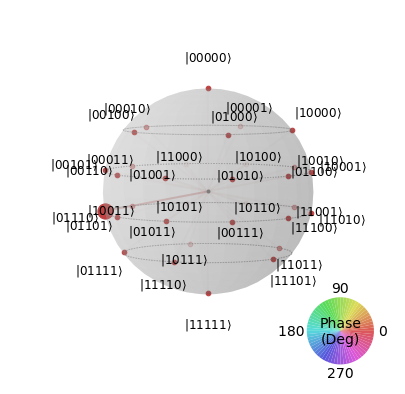

In [24]:
quantum_program = search_steps(my_box, 1)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

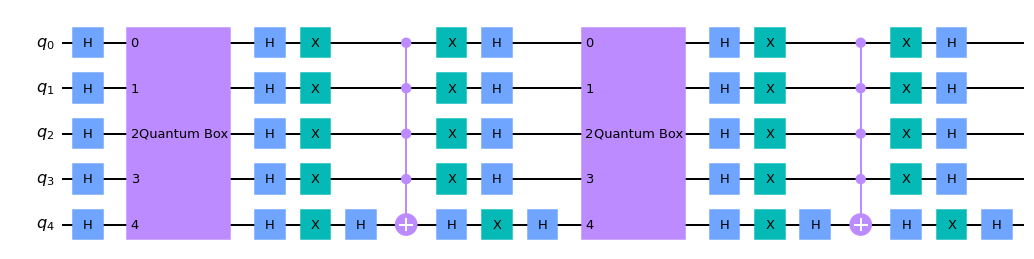

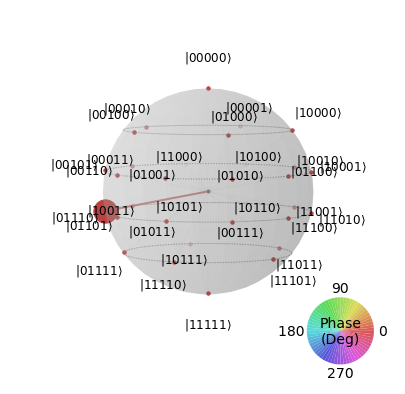

In [25]:
quantum_program = search_steps(my_box, 2)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

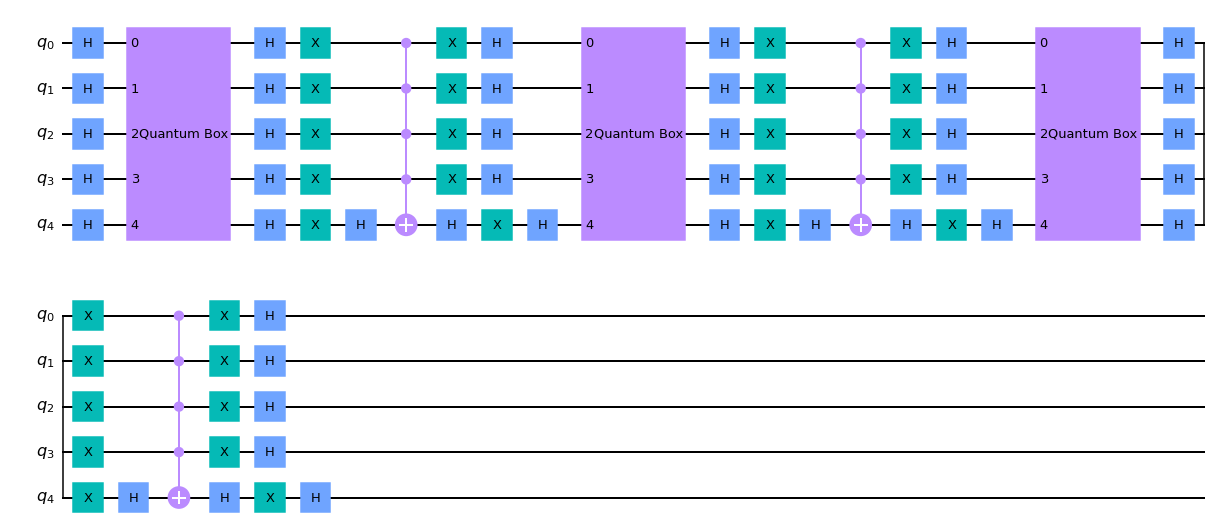

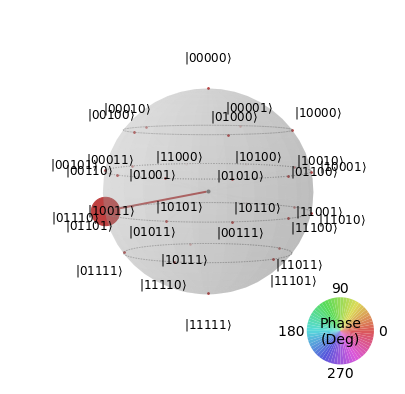

In [26]:
quantum_program = search_steps(my_box, 3)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

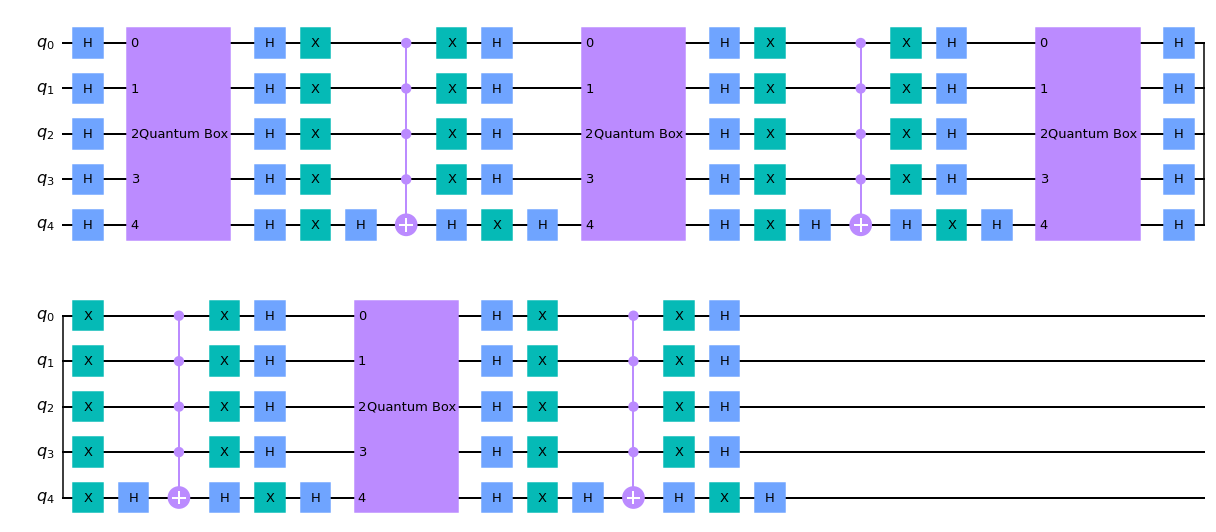

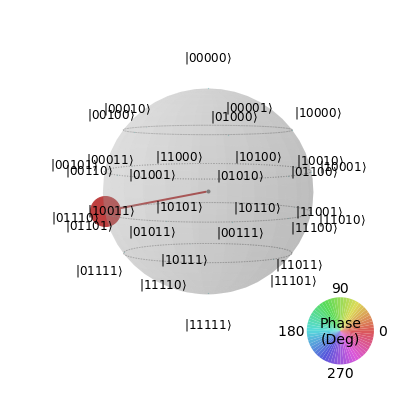

In [27]:
quantum_program = search_steps(my_box, 4)
display(quantum_program.draw())

quantum_state = Statevector.from_instruction(quantum_program)
plot_state_qsphere(quantum_state, use_degrees=True)

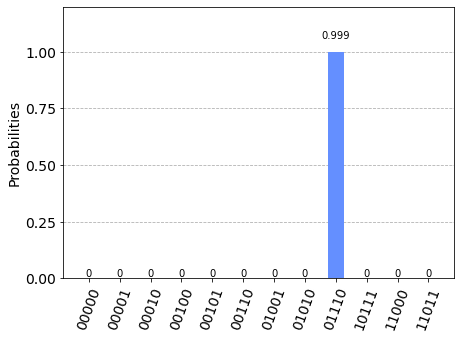

In [28]:
plot_histogram(Statevector.sample_counts(quantum_state, shots=10000))